#### Vivian Xia
## Home Equity Line: KMeans Experiment

## Import packages and data

In [8]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [10]:
df = pd.read_csv("clean_HMEQ_Loss.csv")

In [11]:
TARGET_FLAG = 'TARGET_BAD_FLAG'
TARGET_LOSS = 'TARGET_LOSS_AMT'

## Preprocess data

In [12]:
df1 = df.copy()
df1 = df1.drop( [TARGET_FLAG], axis=1 ) #drop target variable
df1 = df1.drop( [TARGET_LOSS], axis=1 ) 
varNames = df1.columns

print( df1.head() )

   M_MORTDUE  M_VALUE  M_YOJ  M_DEROG  M_DELINQ  M_CLAGE  M_NINQ  M_CLNO  \
0          0        0      0        0         0        0       0       0   
1          0        0      0        0         0        0       0       0   
2          0        0      0        0         0        0       0       0   
3          1        1      1        1         1        1       1       1   
4          0        0      0        0         0        0       0       0   

   M_DEBTINC  O_LOAN  TRUNC_LOAN  O_IMP_MORTDUE  TRUNC_IMP_MORTDUE  \
0          1       0        1100              0            25860.0   
1          1       0        1300              0            70053.0   
2          1       0        1500              0            13500.0   
3          1       0        1500              0            65019.0   
4          1       0        1700              0            97800.0   

   O_IMP_VALUE  TRUNC_IMP_VALUE  O_IMP_YOJ  TRUNC_IMP_YOJ  O_IMP_DEROG  \
0            0          39025.0          0      

In [13]:
dt = df1.dtypes
numList = []
for i in dt.index :
    if i in ( [ TARGET_FLAG, TARGET_LOSS ] ) : continue
    if dt[i] in (["float64","int64"]) : numList.append( i )

print(" NUMBER ")
print(" ------- ")
for i in numList :
    print( i )
print(" ------- ")

 NUMBER 
 ------- 
M_MORTDUE
M_VALUE
M_YOJ
M_DEROG
M_DELINQ
M_CLAGE
M_NINQ
M_CLNO
M_DEBTINC
O_LOAN
TRUNC_LOAN
O_IMP_MORTDUE
TRUNC_IMP_MORTDUE
O_IMP_VALUE
TRUNC_IMP_VALUE
O_IMP_YOJ
TRUNC_IMP_YOJ
O_IMP_DEROG
TRUNC_IMP_DEROG
O_IMP_DELINQ
TRUNC_IMP_DELINQ
O_IMP_CLAGE
TRUNC_IMP_CLAGE
O_IMP_NINQ
TRUNC_IMP_NINQ
O_IMP_CLNO
TRUNC_IMP_CLNO
O_IMP_DEBTINC
TRUNC_IMP_DEBTINC
z_IMP_REASON_HomeImp
z_IMP_REASON_MISSING
z_IMP_JOB_Mgr
z_IMP_JOB_Office
z_IMP_JOB_Other
z_IMP_JOB_ProfExe
z_IMP_JOB_Sales
z_IMP_JOB_Self
 ------- 


In [14]:
truncList = [x for x in numList if x.startswith("TRUNC_")]
truncList

['TRUNC_LOAN',
 'TRUNC_IMP_MORTDUE',
 'TRUNC_IMP_VALUE',
 'TRUNC_IMP_YOJ',
 'TRUNC_IMP_DEROG',
 'TRUNC_IMP_DELINQ',
 'TRUNC_IMP_CLAGE',
 'TRUNC_IMP_NINQ',
 'TRUNC_IMP_CLNO',
 'TRUNC_IMP_DEBTINC']

In [15]:
X = df1.copy() 
X = X[truncList]
varNames = X.columns 

print( X.head().T )
print( "\n\n")
print( X.describe() )

                              0             1             2             3  \
TRUNC_LOAN          1100.000000   1300.000000   1500.000000   1500.000000   
TRUNC_IMP_MORTDUE  25860.000000  70053.000000  13500.000000  65019.000000   
TRUNC_IMP_VALUE    39025.000000  68400.000000  16700.000000  89235.500000   
TRUNC_IMP_YOJ         10.500000      7.000000      4.000000      7.000000   
TRUNC_IMP_DEROG        0.000000      0.000000      0.000000      0.000000   
TRUNC_IMP_DELINQ       0.000000      2.000000      0.000000      0.000000   
TRUNC_IMP_CLAGE       94.366667    121.833333    149.466667    173.466667   
TRUNC_IMP_NINQ         1.000000      0.000000      1.000000      1.000000   
TRUNC_IMP_CLNO         9.000000     14.000000     10.000000     20.000000   
TRUNC_IMP_DEBTINC     34.818262     34.818262     34.818262     34.818262   

                               4  
TRUNC_LOAN           1700.000000  
TRUNC_IMP_MORTDUE   97800.000000  
TRUNC_IMP_VALUE    112000.000000  
TRUNC_IMP_YO

In [16]:
# standardize the data
theScaler = StandardScaler()
theScaler.fit( X )

Y_STD = theScaler.transform( X )
Y_STD = pd.DataFrame( Y_STD )
print( Y_STD.head() )


          0         1         2         3         4         5         6  \
0 -1.701029 -1.187821 -1.218785  0.243923 -0.329584 -0.418963 -1.067294   
1 -1.681321 -0.055078 -0.636046 -0.241631 -0.329584  1.837718 -0.718939   
2 -1.661613 -1.504630 -1.661666 -0.657820 -0.329584 -0.418963 -0.368469   
3 -1.661613 -0.184108 -0.222713 -0.241631 -0.329584 -0.418963 -0.064081   
4 -1.641905  0.656126  0.228887 -0.796550 -0.329584 -0.418963 -1.080400   

          7         8         9  
0 -0.081701 -1.247113  0.141543  
1 -0.791521 -0.736029  0.141543  
2 -0.081701 -1.144896  0.141543  
3 -0.081701 -0.122729  0.141543  
4 -0.791521 -0.736029  0.141543  


In [17]:
varNames_std = []
for i in varNames :
    newName = "std_" + i
    varNames_std.append( newName )

Y_STD.columns = varNames_std
print( Y_STD.head() )
print( "\n\n")
print( Y_STD.describe() )

   std_TRUNC_LOAN  std_TRUNC_IMP_MORTDUE  std_TRUNC_IMP_VALUE  \
0       -1.701029              -1.187821            -1.218785   
1       -1.681321              -0.055078            -0.636046   
2       -1.661613              -1.504630            -1.661666   
3       -1.661613              -0.184108            -0.222713   
4       -1.641905               0.656126             0.228887   

   std_TRUNC_IMP_YOJ  std_TRUNC_IMP_DEROG  std_TRUNC_IMP_DELINQ  \
0           0.243923            -0.329584             -0.418963   
1          -0.241631            -0.329584              1.837718   
2          -0.657820            -0.329584             -0.418963   
3          -0.241631            -0.329584             -0.418963   
4          -0.796550            -0.329584             -0.418963   

   std_TRUNC_IMP_CLAGE  std_TRUNC_IMP_NINQ  std_TRUNC_IMP_CLNO  \
0            -1.067294           -0.081701           -1.247113   
1            -0.718939           -0.791521           -0.736029   
2       

The values are all within -5 and 5.

## KMeans Clustering

In [ ]:
def clusterData( DATA, TRN_DATA, K, TARGET ) :
    print("\n\n\n")
    print("K = ",K)
    print("=======")
    km = KMeans( n_clusters=K, random_state = 1 )
    km.fit( TRN_DATA )
    Y = km.predict( TRN_DATA )
    DATA["CLUSTER"] = Y
    print( DATA.head() )

    G = DATA.groupby("CLUSTER")
    print( G.mean() )
    print("\n\n\n")
    print( G[ TARGET ].value_counts() )

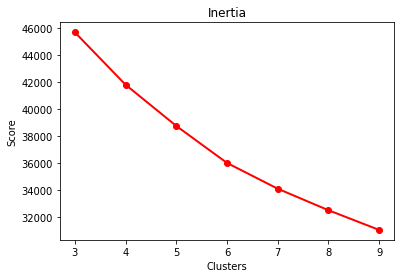

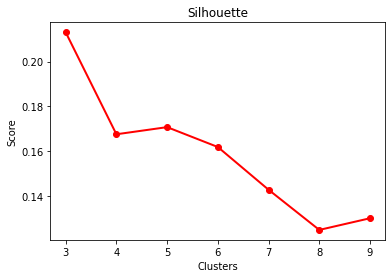

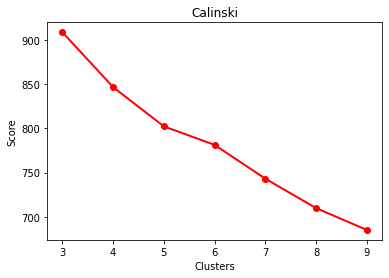

In [18]:
K_LIST = []
I_LIST = []
S_LIST = []
C_LIST = []


for K in range(3,10) :  #look for 3-9 clusters 
    km = KMeans( n_clusters=K, random_state = 1 )
    km.fit( Y_STD )
    Y = km.predict( Y_STD ) #put trained data into clusters
    K_LIST.append( K )
    I_LIST.append( km.inertia_ ) #get inertia score
    S_LIST.append( silhouette_score(Y_STD,km.labels_) ) #silhouette score
    C_LIST.append( calinski_harabasz_score(Y_STD,km.labels_) )  #calinski harabasz score



def drawElbow( K, SCORE, LABEL ) :
    plt.plot( K , SCORE, 'ro-', linewidth=2)
    plt.title(LABEL)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()

drawElbow( K_LIST, I_LIST, "Inertia" )
drawElbow( K_LIST, S_LIST, "Silhouette" )
drawElbow( K_LIST, C_LIST, "Calinski" )

The inertia plot does not really have any point where there is clear elbow or flattening in its graph. The silhouette plot decreases at 4 and then increases at 5, so it may be a good idea to stick with 4 clusters. The calinksi plot flattens at 5 clusters. I am going to go with 4 clusters.

In [20]:
clusterData( df, Y_STD, 4, TARGET_FLAG )





K =  4
   TARGET_BAD_FLAG  TARGET_LOSS_AMT  M_MORTDUE  M_VALUE  M_YOJ  M_DEROG  \
0                1            641.0          0        0      0        0   
1                1           1109.0          0        0      0        0   
2                1            767.0          0        0      0        0   
3                1           1425.0          1        1      1        1   
4                0              NaN          0        0      0        0   

   M_DELINQ  M_CLAGE  M_NINQ  M_CLNO  M_DEBTINC  O_LOAN  TRUNC_LOAN  \
0         0        0       0       0          1       0        1100   
1         0        0       0       0          1       0        1300   
2         0        0       0       0          1       0        1500   
3         1        1       1       1          1       0        1500   
4         0        0       0       0          1       0        1700   

   O_IMP_MORTDUE  TRUNC_IMP_MORTDUE  O_IMP_VALUE  TRUNC_IMP_VALUE  O_IMP_YOJ  \
0              0            258

If in cluster 0, the person will more likely have their loan default. If in cluster 1, 2, and 3, the loan will probably not default. There is some overlap for all the clusters.

Cluster 1 has a larger average TRUNC_LOAN, TRUNC_IMP_MORTDUE, TRUNC_IMP_VALUE, etc. value than the other clusters. A person that has a larger loan amount, current outstanding mortgage due, value of their house will more likely have their loan not default. The users in this cluster also are more often self-employed. 